In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [77]:
data = pd.read_csv('/home/miro/Bachelor/BT/Analysis/data/outputs/final.csv')
data.head()

,timestamp,cons_radnice,cons_zs_preislerova,cons_zs_komenskeho,cons_ms_preislerova,cons_ms_pod_homolkou,cons_ms_vrchlickeho,cons_dum_pro_duchodce,cons_ms_drasarova,cons_ms_tovarni,...,Pressure,temp,solar,Rain,shinning,humidity,SunRise,SunSet,Daylight,DaylightMinutes
0,2023-01-01 00:00:00,0.000000,0.000163,0.002045,0.000181,0.000719,0.000019,0.000016,0.000033,0.000356,...,959.0,11.5,2983,0.0,0.6,65,2023-01-01 08:02:00,2023-01-01 16:11:00,0 days 08:09:00,489.0
1,2023-01-01 00:15:00,0.000000,0.000948,0.001641,0.000518,0.000793,0.000125,0.000019,0.000270,0.000360,...,959.0,11.5,2983,0.0,0.6,65,2023-01-01 08:02:00,2023-01-01 16:11:00,0 days 08:09:00,489.0
2,2023-01-01 00:30:00,0.000000,0.001030,0.001296,0.000286,0.000472,0.000103,0.000016,0.000120,0.000339,...,959.0,11.5,2983,0.0,0.6,65,2023-01-01 08:02:00,2023-01-01 16:11:00,0 days 08:09:00,489.0
3,2023-01-01 00:45:00,0.000059,0.000948,0.001158,0.000496,0.000371,0.000107,0.000020,0.000176,0.000369,...,959.0,11.5,2983,0.0,0.6,65,2023-01-01 08:02:00,2023-01-01 16:11:00,0 days 08:09:00,489.0
4,2023-01-01 01:00:00,0.000891,0.000752,0.001890,0.000632,0.000574,0.000077,0.000018,0.000195,0.000437,...,959.0,11.5,2983,0.0,0.6,65,2023-01-01 08:02:00,2023-01-01 16:11:00,0 days 08:09:00,489.0


In [78]:
data.columns

Index(['timestamp', 'cons_radnice', 'cons_zs_preislerova',
       'cons_zs_komenskeho', 'cons_ms_preislerova', 'cons_ms_pod_homolkou',
       'cons_ms_vrchlickeho', 'cons_dum_pro_duchodce', 'cons_ms_drasarova',
       'cons_ms_tovarni', 'cons_ms_na_machovne', 'cons_zimni_stad',
       'cons_plavecky_areal', 'cons_parkovaci_dum',
       'prod_area_01_ms_vrchlickeho', 'prod_area_02_ms_vrchlickeho',
       'prod_area_03_ms_vrchlickeho', 'prod_total_ms_vrchlickeho',
       'prod_ms_machovne', 'prod_pristavba_preislerova', 'prod_parkovaci_dum',
       'prod_ms_preislerova', 'prod_ms_homolkou', 'prod_area_01_zs_komenskeho',
       'prod_area_02_zs_komenskeho', 'prod_total_zs_komenskeho',
       'prod_zs_preislerova', 'prod_area_01_zimni_stad',
       'prod_area_02_zimni_stad', 'prod_total_zimni_stad', 'prod_ms_drasarova',
       'Date', 'snow', 'Pressure', 'temp', 'solar', 'Rain', 'shinning',
       'humidity', 'SunRise', 'SunSet', 'Daylight', 'DaylightMinutes'],
      dtype='object')

## Table of consumption and production Columns

| COLUMN| Production |
|---    |---         |
|timestamp | Primary key|
|cons_radnice | ***NO MATCH***|
|cons_zs_preislerova | prod_zs_preislerova |
|cons_zs_komenskeho | prod_total_zs_komenskeho |
|cons_ms_preislerova | prod_ms_preislerova |
|cons_ms_pod_homolkou | prod_ms_homolkou |
|cons_ms_vrchlickeho | prod_total_ms_vrchlickeho|
|cons_dum_pro_duchodce | ***NO MATCH***|
|cons_ms_drasarova | prod_ms_drasarova |
|cons_ms_tovarni | ***NO MATCH***|
|cons_ms_na_machovne | prod_ms_machovne|
|cons_zimni_stad | prod_total_zimni_stad |
|cons_plavecky_areal |***NO MATCH*** |
|cons_parkovaci_dum | prod_parkovaci_dum |
|***NO MATCH*** | prod_pristavba_preislerova|


In [81]:
column_mapping = {
    'cons_zs_preislerova': 'prod_zs_preislerova',
    'cons_zs_komenskeho': 'prod_total_zs_komenskeho',
    'cons_ms_preislerova': 'prod_ms_preislerova',
    'cons_ms_pod_homolkou': 'prod_ms_homolkou',
    'cons_ms_vrchlickeho': 'prod_total_ms_vrchlickeho',
    'cons_ms_drasarova': 'prod_ms_drasarova',
    'cons_ms_na_machovne': 'prod_ms_machovne',
    'cons_zimni_stad': 'prod_total_zimni_stad',
    'cons_parkovaci_dum': 'prod_parkovaci_dum',
    'cons_radnice': '',
    'cons_ms_tovarni': '',
    'cons_dum_pro_duchodce': '',
    'cons_plavecky_areal': '',
    '' : 'prod_pristavba_preislerova'
}

diff_data = pd.DataFrame({'timestamp': data['timestamp']})
for cons_col, prod_col in column_mapping.items():
    if cons_col in data.columns and prod_col in data.columns:
        diff_data[cons_col[5:]] = data[prod_col] - data[cons_col]
    elif (cons_col == ''):
        diff_data[prod_col[5:]] = data[prod_col]
    elif (prod_col == ''):
        diff_data[cons_col[5:]] = - data[cons_col]
    

production_cols = list(column_mapping.values()) + ['prod_pristavba_preislerova']
prod_data = data[['timestamp'] + [col for col in production_cols if col in data.columns]]

diff_data['timestamp'] = pd.to_datetime(diff_data['timestamp'])
diff_data.set_index('timestamp', inplace=True)
prod_data['timestamp'] = pd.to_datetime(prod_data['timestamp'])
prod_data.set_index('timestamp', inplace=True)

/tmp/ipykernel_168451/933558304.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_data['timestamp'] = pd.to_datetime(prod_data['timestamp'])


In [82]:
diff_data.columns

Index(['zs_preislerova', 'zs_komenskeho', 'ms_preislerova', 'ms_pod_homolkou',
       'ms_vrchlickeho', 'ms_drasarova', 'ms_na_machovne', 'zimni_stad',
       'parkovaci_dum', 'radnice', 'ms_tovarni', 'dum_pro_duchodce',
       'plavecky_areal', 'pristavba_preislerova'],
      dtype='object')

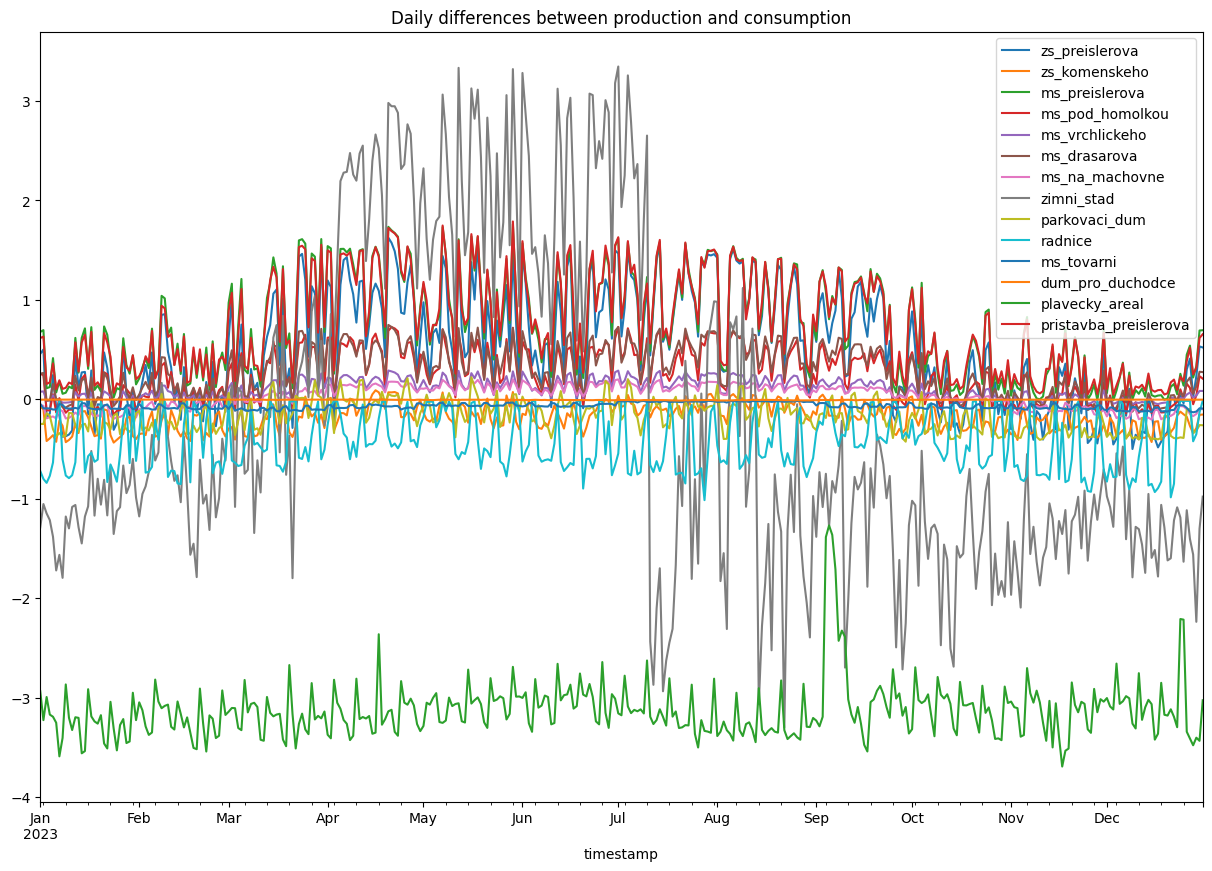

In [84]:
fig = plt.figure(figsize=(15, 10))
diff_data.resample('D').sum().plot(ax=fig.gca())
plt.title('Daily differences between production and consumption')
plt.show()


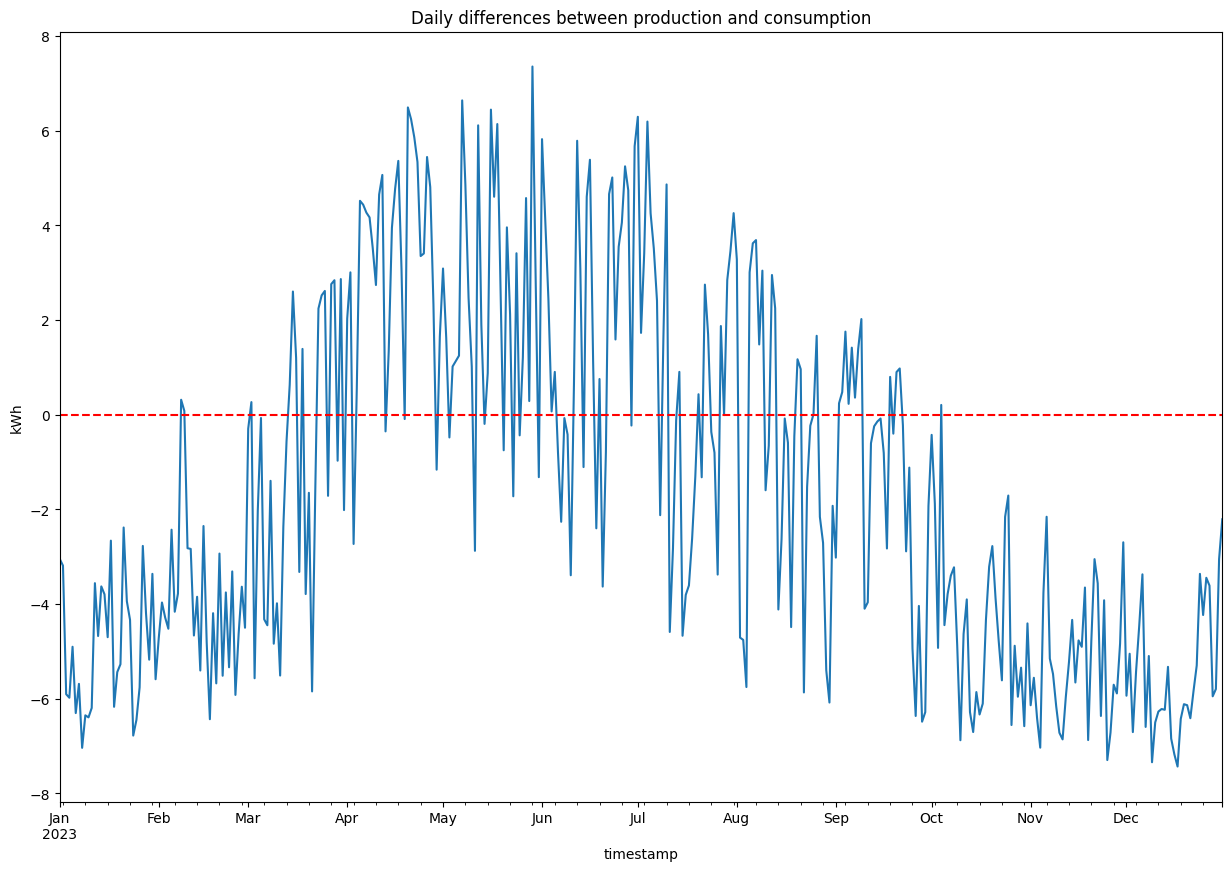

In [85]:
fig = plt.figure(figsize=(15, 10))
diff_data.resample('D').sum().sum(axis=1).plot(ax=fig.gca())
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Daily differences between production and consumption')
plt.ylabel('kWh')
plt.show()

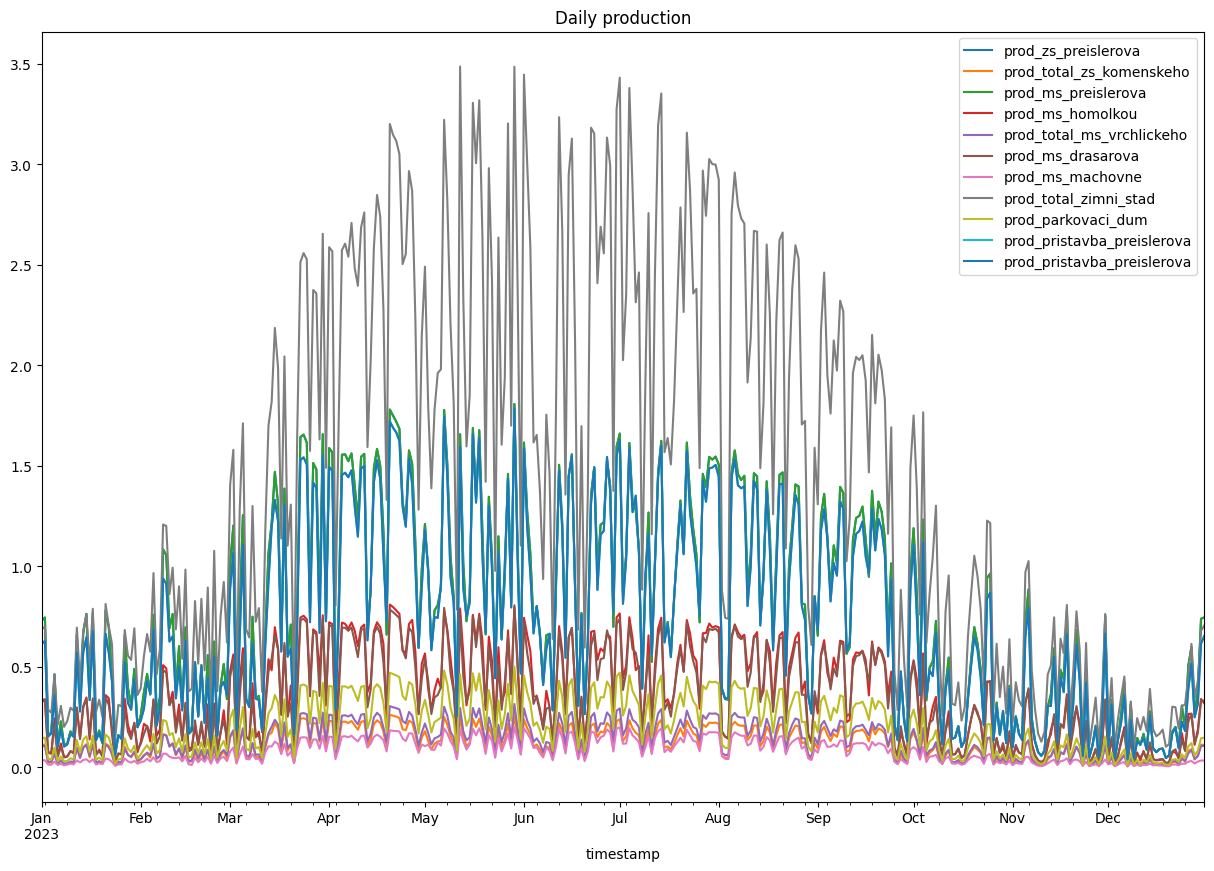

In [87]:
fig = plt.figure(figsize=(15, 10))
prod_data.resample('D').sum().plot(ax=fig.gca())
plt.title('Daily production')
plt.show()

## Simulation process

1. Simulation of energy production
2. Consumption of own energy and difference pushed to sharing pot
3. Energy allocation
   1. Allocation function definition
   2. 5 iterations of allocation
   3. Minimize difference |Distributed - Consumed|
4. End of iteration
5. Save difference |Distributed - Consumed|

### Parameters

| Building            | Address                                       | Yearly Consumption |
| ---                 |  ---                                          | ---                |
|radnice              |	Husovo nám. 68, 266 01, Beroun-Centrum        | 156.67             |
|základní škola       |	Preislerova 1335, 266 01 Beroun               | 103.60             |
|mateřská škola       | Preislerova 1335, 266 01 Beroun               | 18.90              |
|přístavba tělocvičny | ZŠ	Preislerova 1335, 266 01 Beroun           | 88.64              |
|mateřská škola       |	Pod Homolkou 1601, 266 01 Beroun              | 45.65              |
|mateřská škola       | Vrchlického 63, 266 01 Beroun                 | 11.33              |
|domov pro důchodce   | Na Parkáně 111, 266 01 Beroun-Město           | 20.05              |
|mateřská škola       | Drašarova 1447, 266 01, Beroun                | 25.39              |    
|plavecký areál       | Na Ostrově 900, 266 01 Beroun                 | 1,142.38           |    
|zimní stadion        | Na Ostrově 83, 266 01 Beroun-Závodí           | 590.88             |
|parkovací dům        | Politických vězňů 1940, 266 01 Beroun         | 137.10             |
|mateřská škola       |	Tovární 44, 26601 Beroun                      | 20.64              |
|základní škola       |	Komenského 249/4, Beroun-Závodí, 26601 Beroun | 110.06             |
|mateřská škola       |	Na Máchovně, 266 01, Beroun                   | 61.39              |




In [88]:
yearly_consumption_data = {
    'radnice': 156.67,
    'zs_preislerova': 103.60,
    'ms_preislerova': 18.90,
    'pristavba_preislerova': 88.64,
    'ms_pod_homolkou': 45.65,
    'ms_vrchlickeho': 11.33,
    'dum_pro_duchodce': 20.05,
    'ms_drasarova': 25.39,
    'plavecky_areal': 1142.38,
    'zimni_stad': 590.88,
    'parkovaci_dum': 137.10,
    'ms_tovarni': 20.64,
    'zs_komenskeho': 110.06,
    'ms_na_machovne': 61.39
}

# Create DataFrame
y_df = pd.DataFrame(list(yearly_consumption_data.items()), columns=['Column', 'Y_cons'])


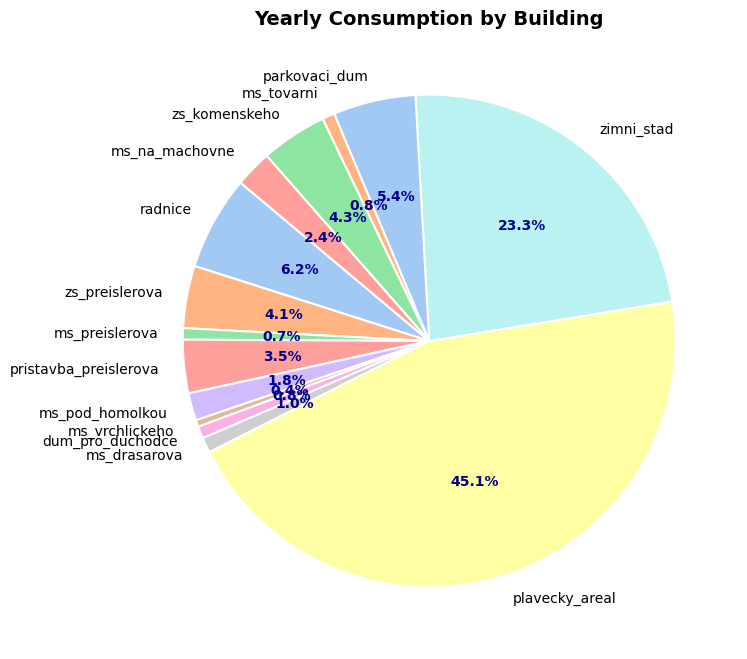

In [89]:
y_df['Proportion'] = y_df['Y_cons'] / y_df['Y_cons'].sum() 


colors = sns.color_palette("pastel", len(y_df))  
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    y_df['Y_cons'], 
    labels=y_df['Column'], 
    autopct='%1.1f%%', 
    startangle=140,
    colors=colors, 
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},  
    textprops={'fontsize': 10, 'color': 'black'}
)

plt.setp(autotexts, size=10, weight="bold", color="darkblue")
plt.title("Yearly Consumption by Building", fontsize=14, fontweight="bold")
plt.show()